In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

In [29]:
train = pd.read_csv('../data/train_cleaned.csv')
train.head()

,id,is_delinquent,length_of_credit,number_of_delinquent_months,average_delinquency_rate,3mo_delinquency,6mo_delinquency,12mo_delinquency,flag_own_car,flag_own_realty,...,name_family_status,name_housing_type,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,age,years_employed
0,5008804,0,16,2,0.125000,0,0,0,Y,Y,...,Civil marriage,Rented apartment,1,1,0,0,missing,2.0,32,12
1,5008805,0,15,2,0.133333,0,0,0,Y,Y,...,Civil marriage,Rented apartment,1,1,0,0,missing,2.0,32,12
2,5008806,0,30,7,0.233333,0,0,1,Y,Y,...,Married,House / apartment,1,0,0,0,Security staff,2.0,58,3
3,5008808,1,5,2,0.400000,1,1,1,N,Y,...,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8
4,5008809,0,5,0,0.000000,0,0,0,N,Y,...,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8


In [65]:
train.columns

Index(['id', 'is_delinquent', 'length_of_credit',
       'number_of_delinquent_months', 'average_delinquency_rate',
       '3mo_delinquency', '6mo_delinquency', '12mo_delinquency',
       'flag_own_car', 'flag_own_realty', 'cnt_children', 'amt_income_total',
       'name_income_type', 'name_education_type', 'name_family_status',
       'name_housing_type', 'flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type', 'cnt_fam_members', 'age',
       'years_employed'],
      dtype='object')

### In this notebook, we'll explore the relationship between the variables and our three possible 4 possible targets: to classify if the person is delinquent at the moment, if the person was delinquent in the past three months, six and twelve months.
Variables that may make sense to have influence on the delinquency status of a person will be explored: variables such as owning a car, owning realty and the number of children the person has.

First of all, we are going to explore here how the target variables are distributed. We can see that in the last month, the majority of people weren't delinquent. Going back to the past 3, 6 and 12 months, we can see the proportion of delinquent people goes up. We can see that 6 months gives the most balanced proportion between delinquent and non delinquent.

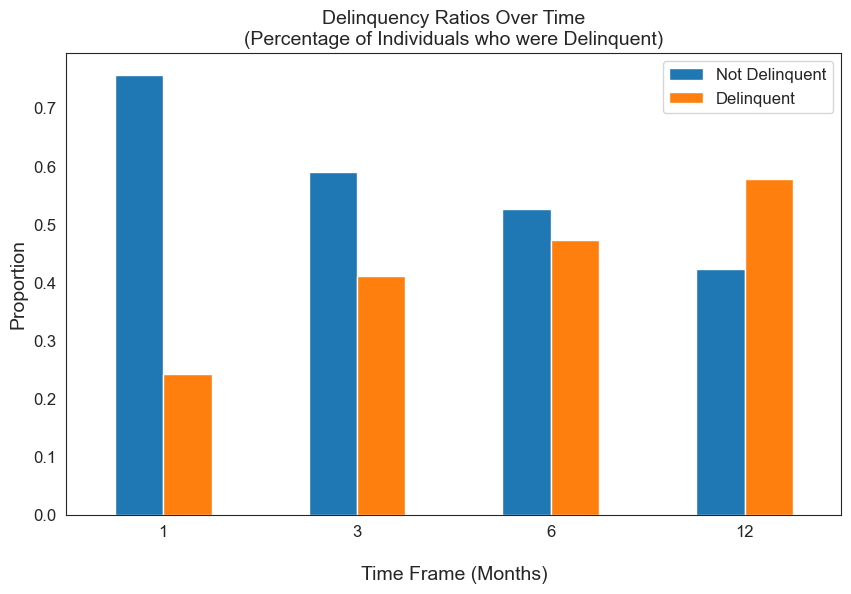

In [30]:
sns.set_style('white')

ratios = pd.concat(
    [train['is_delinquent'].value_counts(normalize=True),
     train['3mo_delinquency'].value_counts(normalize=True),
     train['6mo_delinquency'].value_counts(normalize=True),
     train['12mo_delinquency'].value_counts(normalize=True)
    ],
    axis=1,
).rename(index={0:'Not Delinquent', 1:'Delinquent'}, 
         columns={'is_delinquent': 1, 
                  '3mo_delinquency':3, 
                  '6mo_delinquency':6, 
                  '12mo_delinquency':12}).T

ratios.plot(kind='bar', figsize=(10, 6))
plt.xlabel('\nTime Frame (Months)', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Delinquency Ratios Over Time\n(Percentage of Individuals who were Delinquent)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('../Images/Delinquency-Ratios.png', dpi=300);


Exploring the data, one thing that pop up was the difference between the incomes of people with different occupation types. The difference between low skill and other more demanding jobs does not appear to make much sense...
<br> <br>
Let's look at the other variables that may have an influence on deliquency status and the proportion of delinquency between different groups.

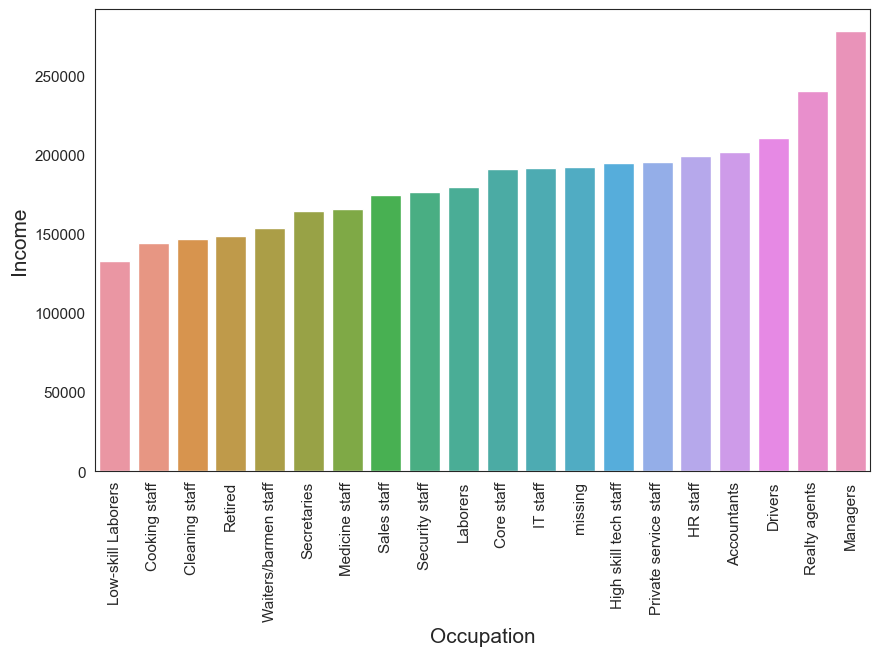

In [31]:
grouped = train.groupby('occupation_type')['amt_income_total'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped.index, y=grouped)
plt.xlabel('Occupation', fontsize=15)
plt.ylabel('Income', fontsize=15)
plt.yticks(fontsize=11)
plt.xticks(rotation=90, fontsize=11)

plt.savefig('../Images/Occupations.png', dpi=300);


# 1 - Owning a car
Here, we explore if a person owning a car and they being delinquent at the moment or in the past 3, 6 and 12 months is different than when they don't own a car.

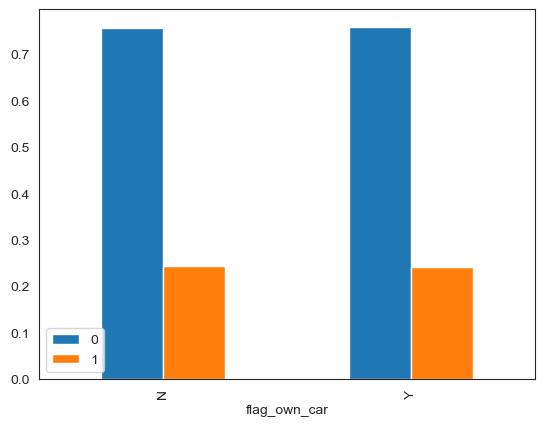

In [32]:
train.groupby('flag_own_car')['is_delinquent'].value_counts(normalize=True)\
        .unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');

> In the last month, it does not look that the delinquency proportion is different between the group who has car and the group who does not. Looking at the last 6 months, the proportion differences between groups account for less than 2%.

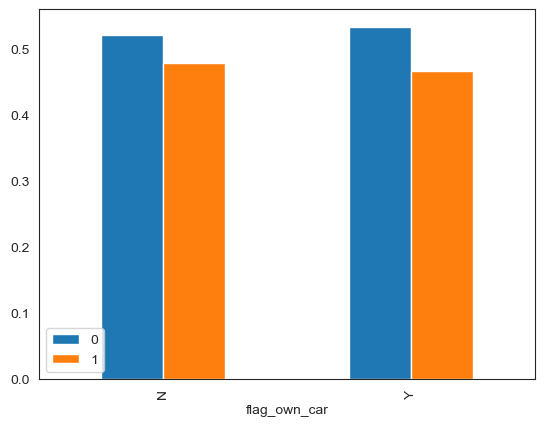

In [33]:
train.groupby('flag_own_car')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');

In [34]:
train.groupby('flag_own_car')['6mo_delinquency'].value_counts(normalize=True)\
            .unstack(level = 1)

6mo_delinquency,0,1
flag_own_car,,
N,0.521814,0.478186
Y,0.533834,0.466166


# 2 - Owning realty
Here, we explore if a person owning a realty and they being delinquent at the moment or in the past 3, 6 and 12 months is different than when they don't own realty.

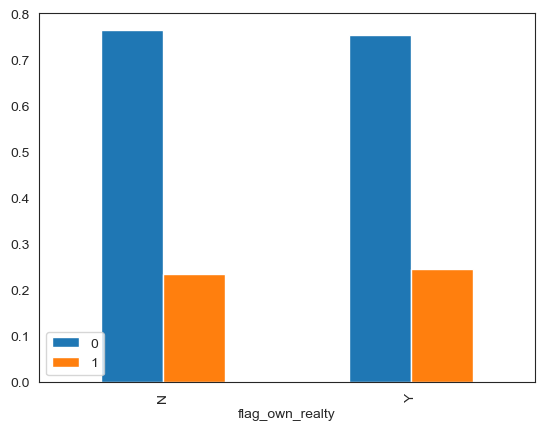

In [35]:
train.groupby('flag_own_realty')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


> In the last month, it does not look that there are delinquency proportion differences between the group who has realty and the group who does not. Looking at the last 6 months, the proportion differences between groups account for less than 3%.

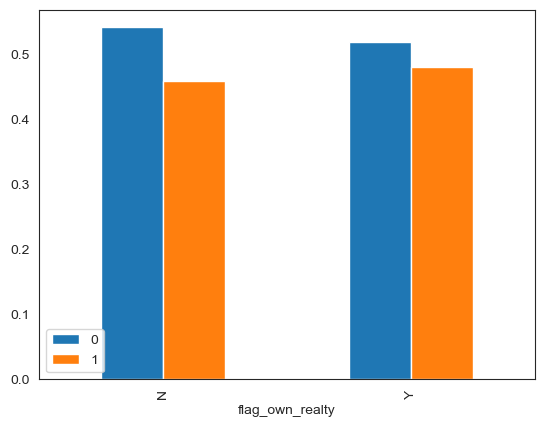

In [36]:
train.groupby('flag_own_realty')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


In [37]:
train.groupby('flag_own_realty')['6mo_delinquency'].value_counts(normalize=True)\
            .unstack(level = 1)

6mo_delinquency,0,1
flag_own_realty,,
N,0.541560,0.458440
Y,0.518986,0.481014


# 3 - Number of children
Here, we explore if the number of children a person has can affect their delinquency status.

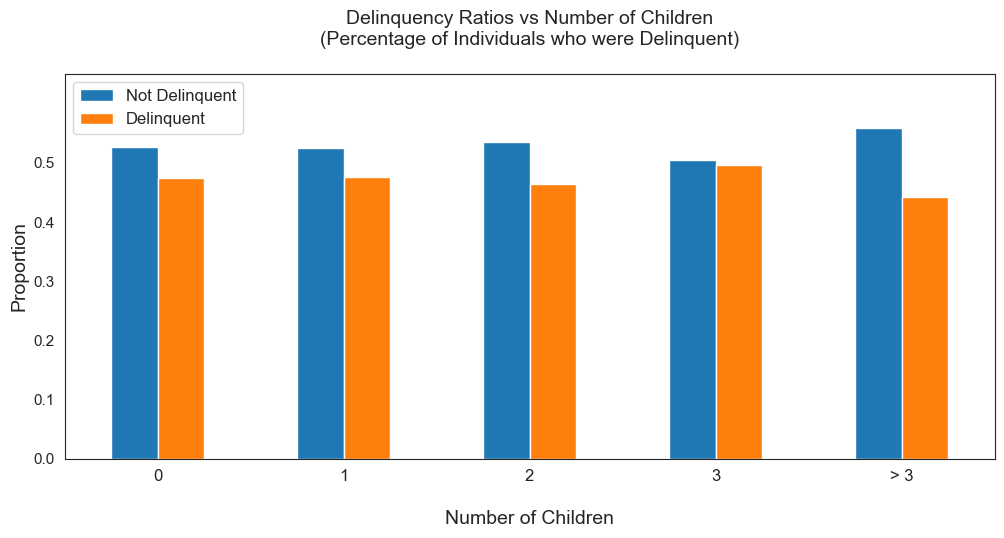

In [38]:
temp = train.copy()
temp['cnt_children'] = np.where(temp['cnt_children']>3, '> 3',temp['cnt_children'])

temp.groupby('cnt_children')['6mo_delinquency']\
        .value_counts(normalize=True).unstack(level = 1)\
        .plot(kind = 'bar', figsize=(12, 5));
labels = ['Not Delinquent', 'Delinquent'] 

plt.legend(labels, loc='best', fontsize=12)
plt.xlabel('\nNumber of Children', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Delinquency Ratios vs Number of Children\n(Percentage of Individuals who were Delinquent)\n', fontsize=14)

yticks=np.arange(0, 0.6, 0.1)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(ticks=yticks, fontsize=11)
plt.ylim(0, 0.65)
plt.savefig('../Images/delinquency-vs-children.png', dpi=300);


The number of a children a person may have in this data set appears to not have much influence in their delinquency status, since the proportion of delinquency between the different groups look very similar. This can be confirmed by the table below.

In [39]:
train[train['cnt_children']<4].groupby('cnt_children')['6mo_delinquency'].value_counts(normalize=True)\
            .unstack(level = 1)

6mo_delinquency,0,1
cnt_children,,
0,0.525934,0.474066
1,0.524807,0.475193
2,0.535625,0.464375
3,0.504132,0.495868


# 4 - Annual income
Here, we explore if the income of a person can affect their delinquency status.

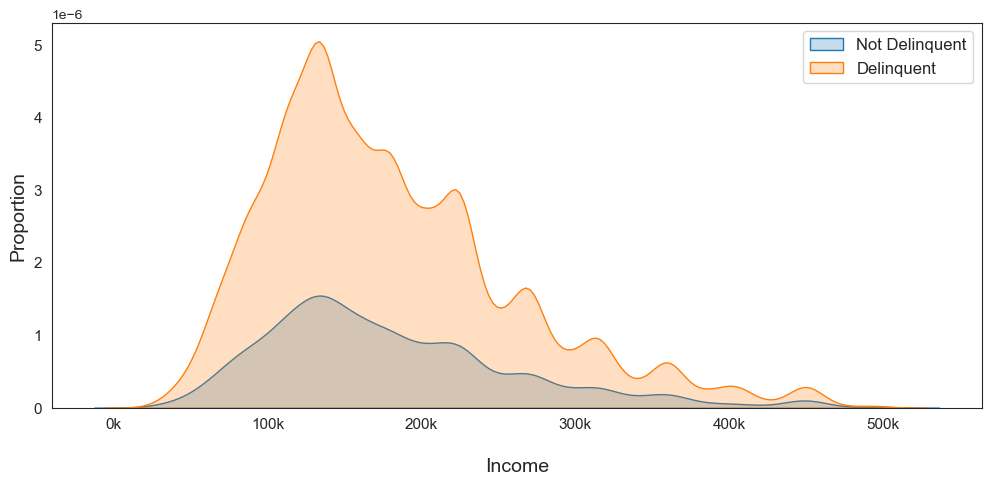

In [40]:
plt.figure(figsize=(12, 5))

sns.kdeplot(train[train['amt_income_total']<0.5e6], x='amt_income_total', hue='is_delinquent', fill=True, palette=['#ff7f0e', '#1f77b4'])

ticks=range(0, 600000, 100000)
tick_labels = [f"{int(i/1000)}k" for i in ticks]
labels = ['Not Delinquent', 'Delinquent'] 

plt.legend(labels, loc='best', fontsize=12)
plt.xlabel('\nIncome', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(ticks=ticks, labels=tick_labels, rotation=0, fontsize=11)
plt.yticks(ticks=None, fontsize=11)
plt.savefig('../Images/delinquency-vs-income.png', dpi=300);


The distribution of the income of delinquent people look very similar to the distribution of the income of not delinquent people. Let's see if looking at the last 6 months this changes.

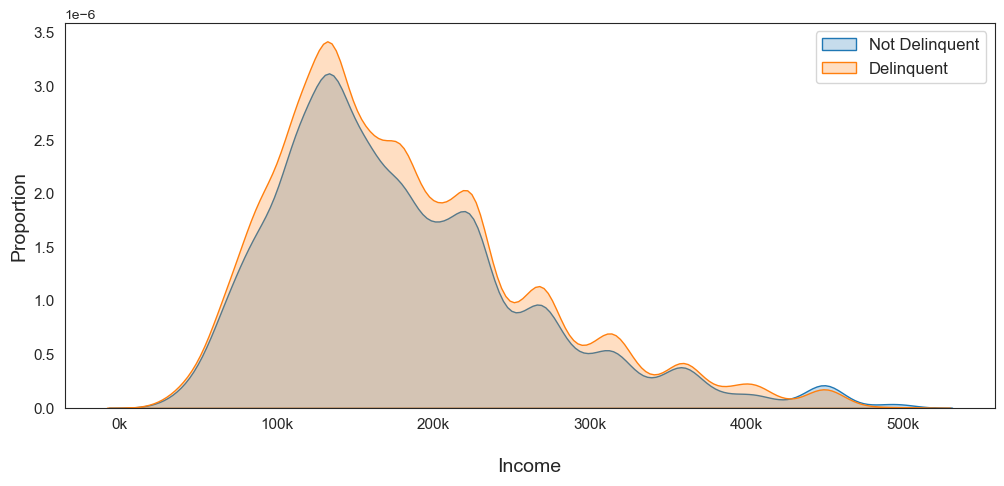

In [41]:
plt.figure(figsize=(12, 5))

sns.kdeplot(train[train['amt_income_total']<0.5e6], x='amt_income_total', hue='6mo_delinquency', fill=True, palette=['#ff7f0e', '#1f77b4'])

ticks=range(0, 600000, 100000)
tick_labels = [f"{int(i/1000)}k" for i in ticks]

plt.legend(labels, loc='best', fontsize=12)
plt.xlabel('\nIncome', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(ticks=ticks, labels=tick_labels, rotation=0, fontsize=11)
plt.yticks(ticks=None, fontsize=11)
plt.savefig('../Images/delinquency-vs-income.png', dpi=300);


The distributions look even more similar looking at the last 6 months.

# 5 - Income type
Here, we explore if the income type a person has can affect their delinquency status.

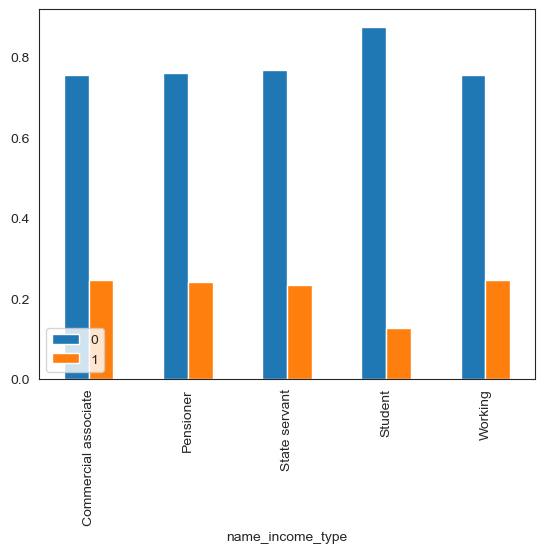

In [63]:
train.groupby('name_income_type')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');

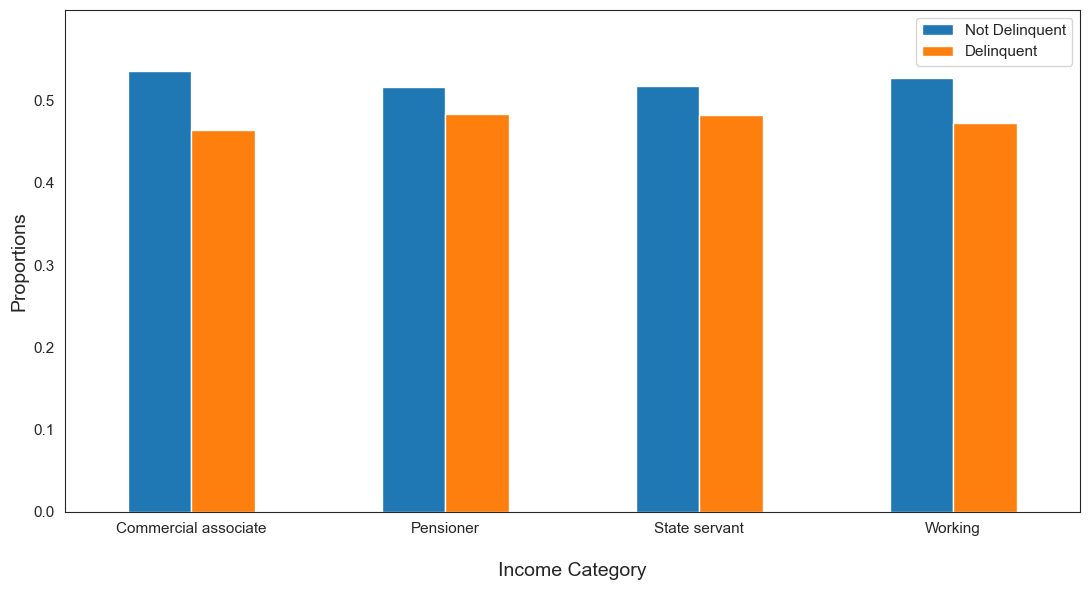

In [300]:
train[train['name_income_type']!='Student'].groupby('name_income_type')['6mo_delinquency']\
        .value_counts(normalize=True).unstack(level = 1)\
        .plot(kind = 'bar', figsize=(11, 6)).legend(loc='best')

labels = ['Not Delinquent', 'Delinquent'] 
yticks=np.arange(0, 0.6, 0.1)

plt.legend(labels= labels, fontsize=11, loc='upper right')

plt.xlabel('\nIncome Category', fontsize=14)
plt.ylabel('Proportions', fontsize=14)
plt.ylim(0,0.61)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(ticks=yticks, fontsize=11)
plt.savefig('../Images/delinquency-vs-income-category.png', dpi=300);



Besides the students' group, the proportion of delinquency are very similar between the groups.

# 6 - Level of Education
Here, we explore if the level of education a person has can affect their delinquency status.

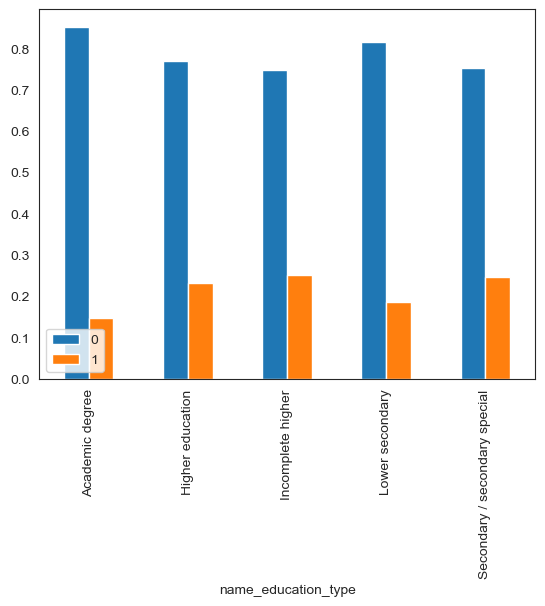

In [44]:
train.groupby('name_education_type')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


In [45]:
train.groupby('name_education_type')['is_delinquent'].value_counts(normalize=True)\
            .unstack(level = 1)

is_delinquent,0,1
name_education_type,,
Academic degree,0.851852,0.148148
Higher education,0.768650,0.231350
Incomplete higher,0.747927,0.252073
Lower secondary,0.814590,0.185410
Secondary / secondary special,0.752363,0.247637


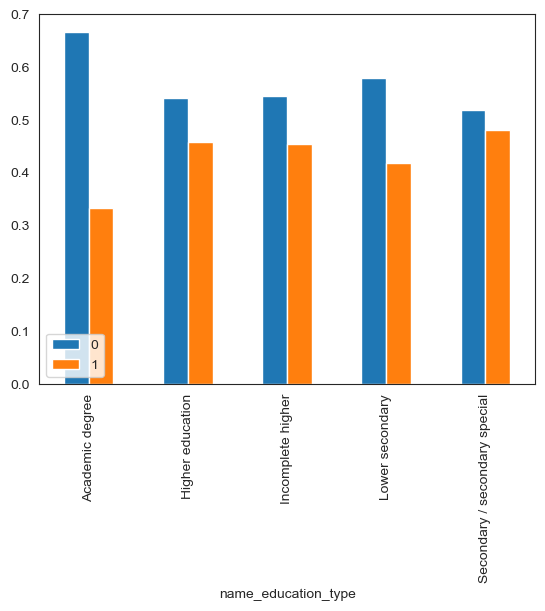

In [46]:
train.groupby('name_education_type')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


In [47]:
train.groupby('name_education_type')['6mo_delinquency'].value_counts(normalize=True)\
            .unstack(level = 1)

6mo_delinquency,0,1
name_education_type,,
Academic degree,0.666667,0.333333
Higher education,0.541617,0.458383
Incomplete higher,0.545605,0.454395
Lower secondary,0.580547,0.419453
Secondary / secondary special,0.518289,0.481711


Edducation level of a persons' seems to have influence on the delinquency status, specially when considering the last 6 months.

# 7 - Family status
Here, we explore if a person's family status can affect their delinquency status.

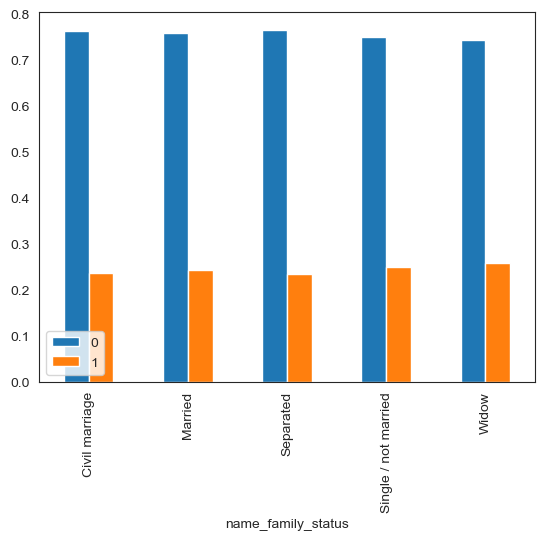

In [48]:
train.groupby('name_family_status')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


From the graph above, we can see that the current proportion of delinquency between groups of different family status look very similar. The difference is around 2% at most.

In [49]:
train.groupby('name_family_status')['is_delinquent'].value_counts(normalize=True)\
            .unstack(level = 1)

is_delinquent,0,1
name_family_status,,
Civil marriage,0.763960,0.236040
Married,0.757966,0.242034
Separated,0.766055,0.233945
Single / not married,0.750852,0.249148
Widow,0.742355,0.257645


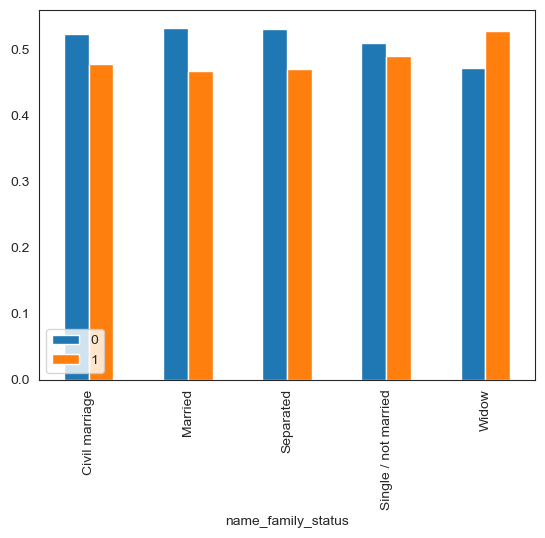

In [50]:
train.groupby('name_family_status')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


In [51]:
train.groupby('name_family_status')['6mo_delinquency'].value_counts(normalize=True)\
            .unstack(level = 1)

6mo_delinquency,0,1
name_family_status,,
Civil marriage,0.522772,0.477228
Married,0.533103,0.466897
Separated,0.530390,0.469610
Single / not married,0.509246,0.490754
Widow,0.472477,0.527523


Looking at the last 6 months, the difference goes up a bit, reaching the maximum value around 5%.

# 8 - Housing type
Here, we explore if the housing type of a person can affect their delinquency status.

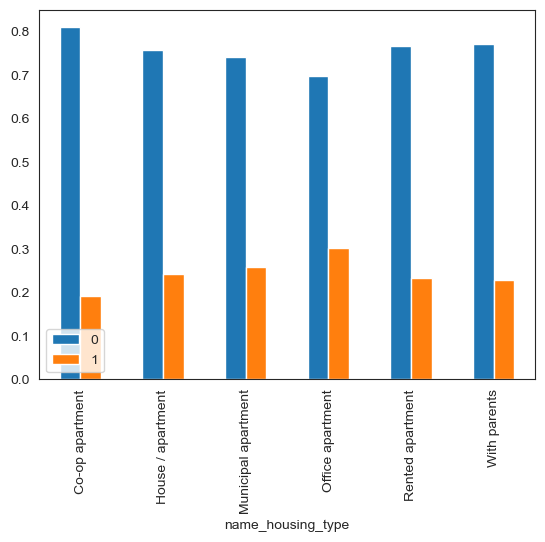

In [52]:
train.groupby('name_housing_type')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


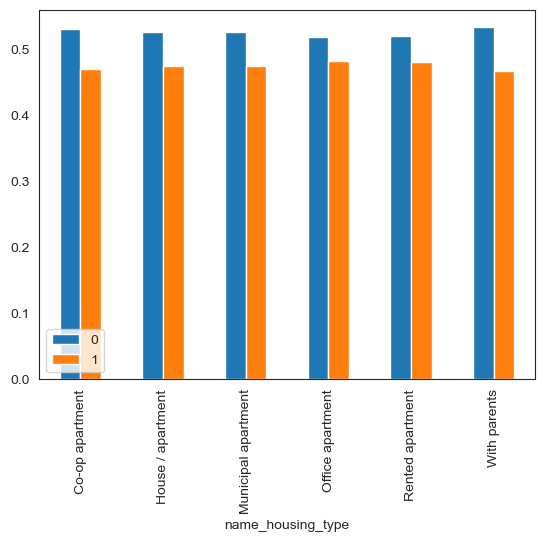

In [53]:
train.groupby('name_housing_type')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


The housing type of a person looks to make more difference in their current delinquency status, looking at the last 6 months the proportion of delinquency is similar between the different groups.

# 9 - Years employed
Here, we explore if the length of employment of a person can affect their delinquency status.

In [54]:
train.columns

Index(['id', 'is_delinquent', 'length_of_credit',
       'number_of_delinquent_months', 'average_delinquency_rate',
       '3mo_delinquency', '6mo_delinquency', '12mo_delinquency',
       'flag_own_car', 'flag_own_realty', 'cnt_children', 'amt_income_total',
       'name_income_type', 'name_education_type', 'name_family_status',
       'name_housing_type', 'flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type', 'cnt_fam_members', 'age',
       'years_employed'],
      dtype='object')

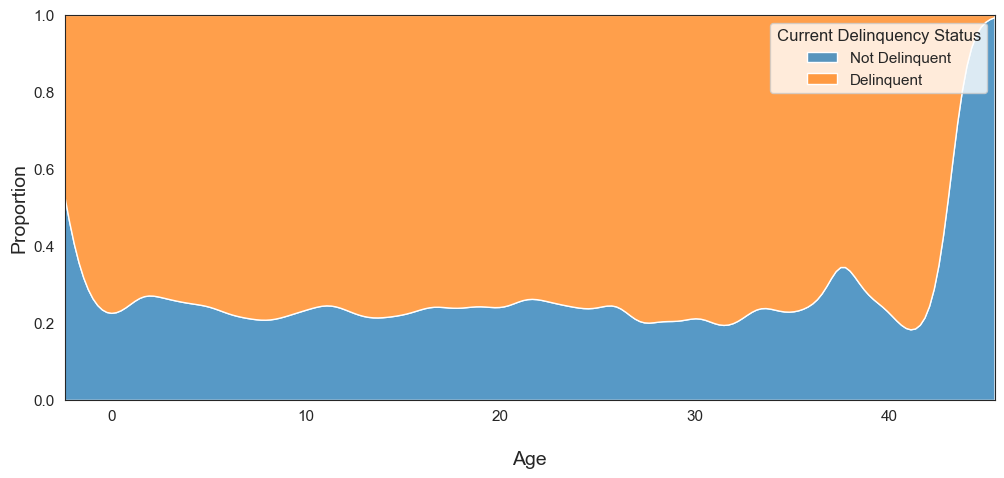

In [64]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=train, x="years_employed", hue="is_delinquent", multiple="fill", legend=True, palette=['#ff7f0e', '#1f77b4'])

plt.legend(title="Current Delinquency Status", 
           labels=["Not Delinquent", "Delinquent"], 
           loc="best", 
           fontsize=11, 
           title_fontsize=12)
plt.xlabel('\nAge', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.savefig('../Images/current-delinquency-vs-yearsemployed.png', dpi=300);

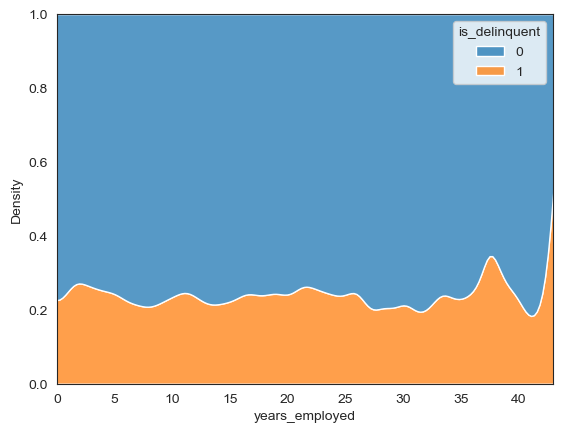

In [55]:
years_min = train['years_employed'].min()
years_max = train['years_employed'].max()


sns.kdeplot(data=train, x="years_employed", hue="is_delinquent", multiple="fill")
plt.xlim(years_min, years_max);

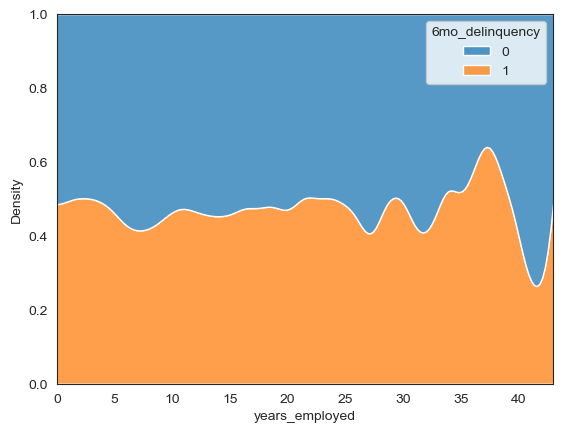

In [62]:
years_min = train['years_employed'].min()
years_max = train['years_employed'].max()


sns.kdeplot(data=train, x="years_employed", hue="6mo_delinquency", multiple="fill")
plt.xlim(years_min, years_max);

In [56]:
train[train['years_employed']>=35]['years_employed'].value_counts()

35    29
41    18
36    13
39    13
40    11
38     9
37     3
42     2
43     1
Name: years_employed, dtype: int64

From the graph above, we may say that the years employed does not have a direct relationship on the delinquency status, since the proportion of delinquency has kind of a random behavior. Since there are few people who are older than 35 years old, we may not consider the proportion very representative.

# 10 - Occupation type
Here, we explore if a person's occupation type can affect their delinquency status.

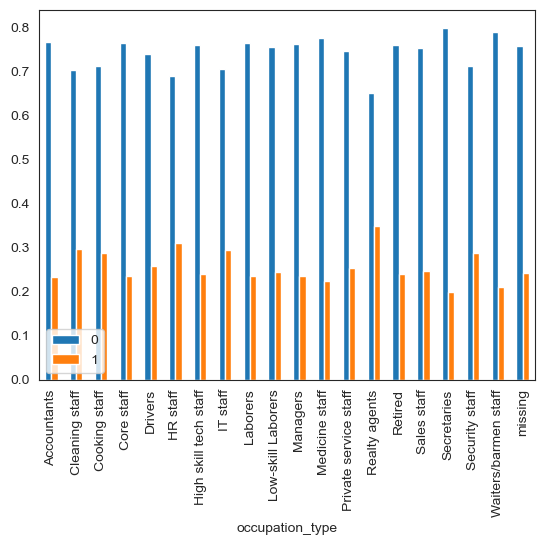

In [57]:
train.groupby('occupation_type')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


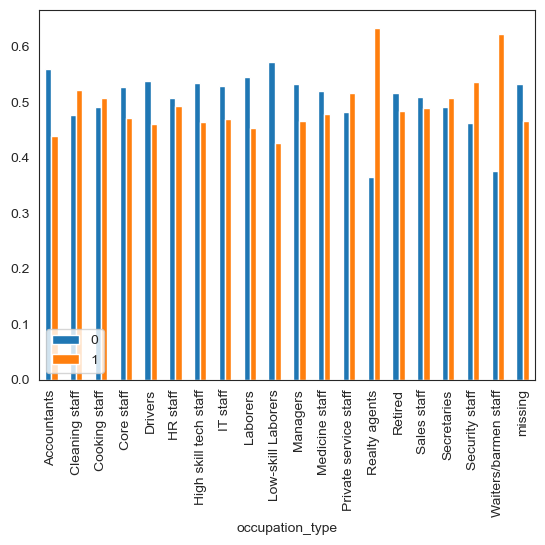

In [58]:
train.groupby('occupation_type')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


Occupation type seems to have an inlfuence in a person's delinquency status.

# 11 - Age
Here, we explore if a person's age can affect their delinquency status.

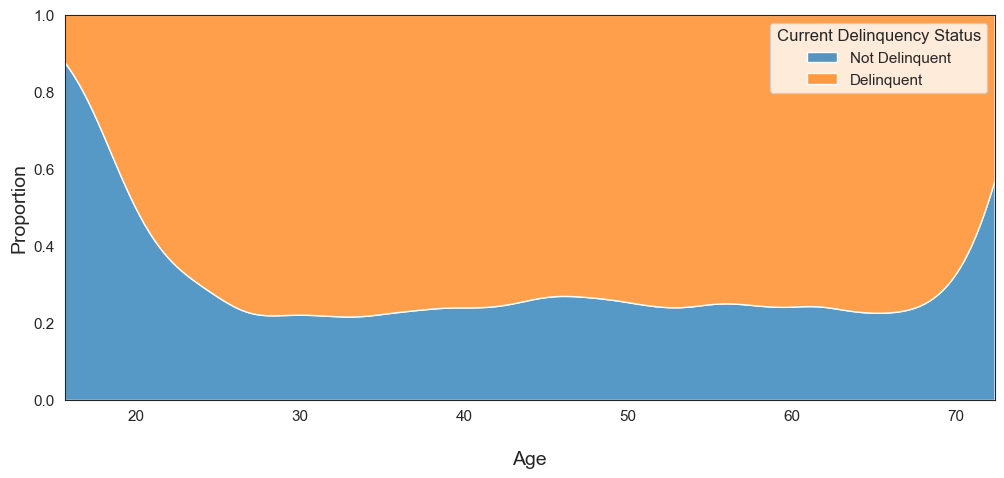

In [59]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=train, x="age", hue="is_delinquent", multiple="fill", legend=True, palette=['#ff7f0e', '#1f77b4'])

plt.legend(title="Current Delinquency Status", 
           labels=["Not Delinquent", "Delinquent"], 
           loc="best", 
           fontsize=11, 
           title_fontsize=12)
plt.xlabel('\nAge', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.savefig('../Images/current-delinquency-vs-age.png', dpi=300);


From late 20s to late 60s, the proportion of current delinquency along different ages remains basically the same.

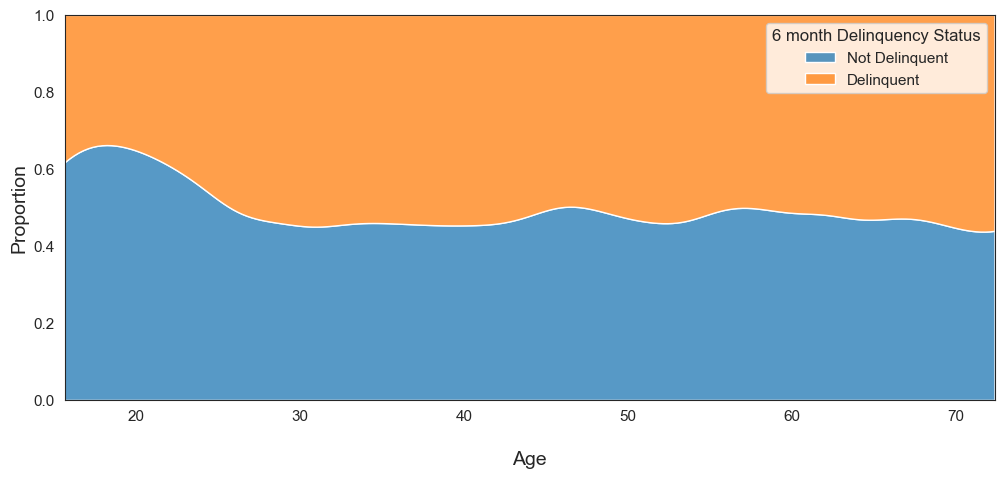

In [60]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=train, x="age", hue="6mo_delinquency", multiple="fill", legend=True, palette=['#ff7f0e', '#1f77b4'])

plt.legend(title="6 month Delinquency Status", 
           labels=["Not Delinquent", "Delinquent"], 
           loc="best", 
           fontsize=11, 
           title_fontsize=12)
plt.xlabel('\nAge', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.savefig('../Images/6mo-delinquency-vs-age.png', dpi=300);


Similar results looking at the last six months, from late 20s, the proportion of delinquency along different ages remains basically the same.